In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

About Dataset
Context
This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

Content
The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

longitude

latitude

housingmedianage

total_rooms

total_bedrooms

population

households

median_income

medianhousevalue

ocean_proximity




Acknowledgements
This data was initially featured in the following paper:
Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.

source: 
https://www.kaggle.com/datasets/camnugent/california-housing-prices

Luís Torgo's page (University of Porto)
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

In [216]:
df = pd.read_csv('housing.csv')

In [217]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [218]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [219]:
len(df)

20640

***Data Visualisation***

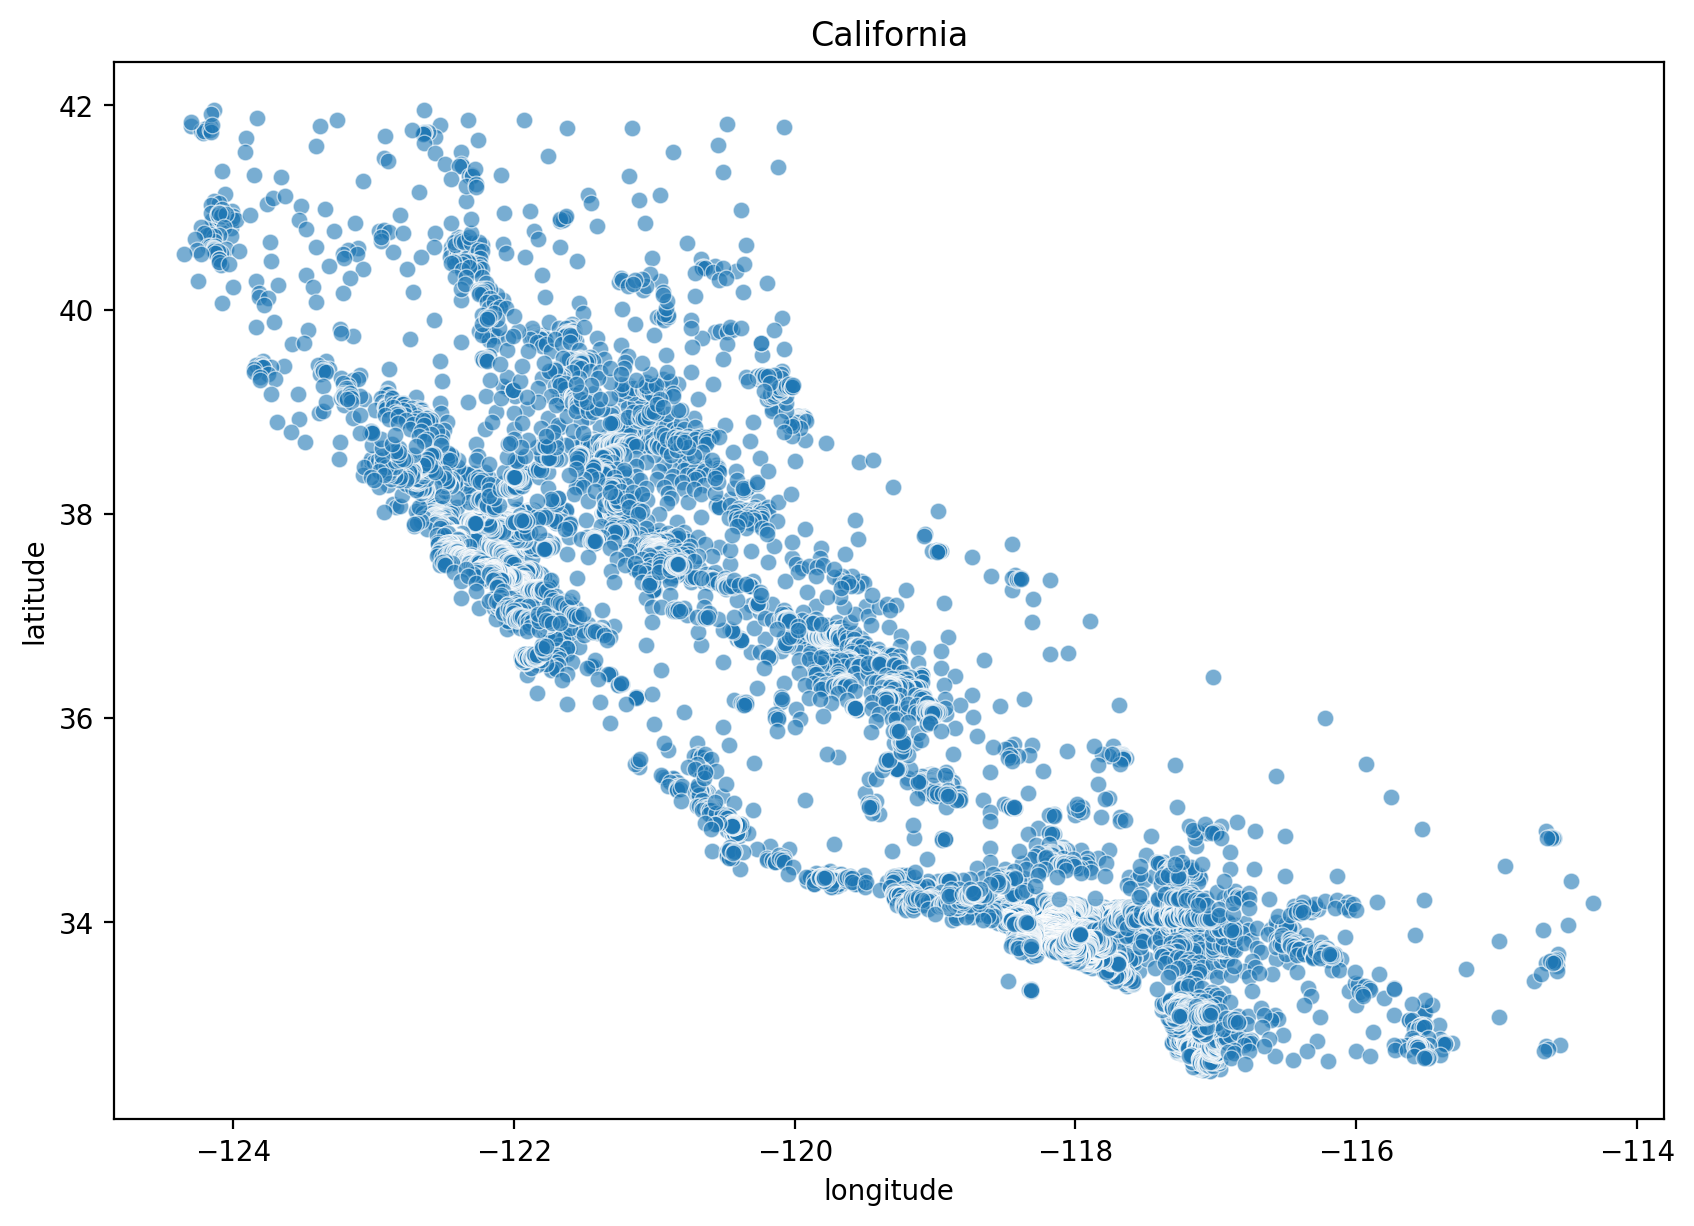

In [220]:
plt.figure(figsize=(10,7), dpi=200)
sns.scatterplot(data=df, x='longitude',y='latitude', alpha=0.6)
plt.title("California");

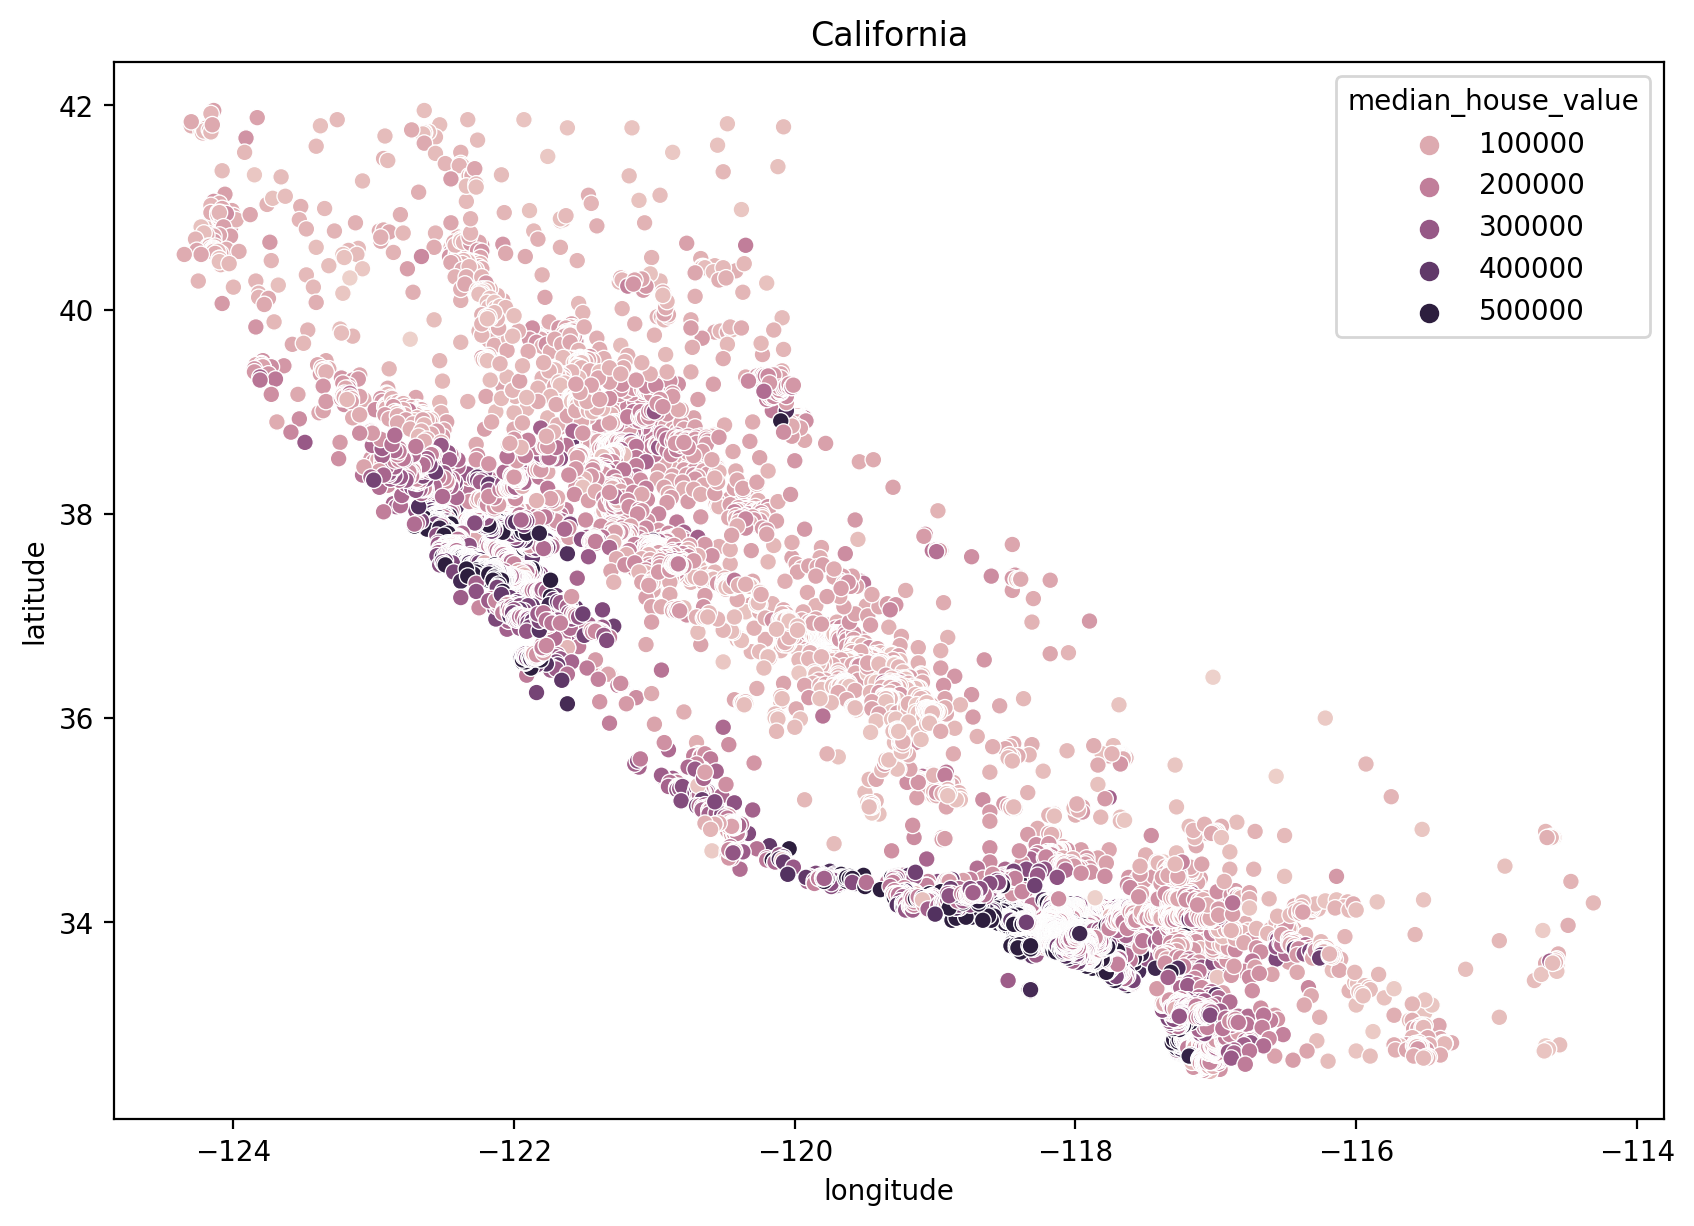

In [221]:
plt.figure(figsize=(10,7), dpi=200)
sns.scatterplot(data=df, x='longitude',y='latitude', hue='median_house_value')
plt.title("California");

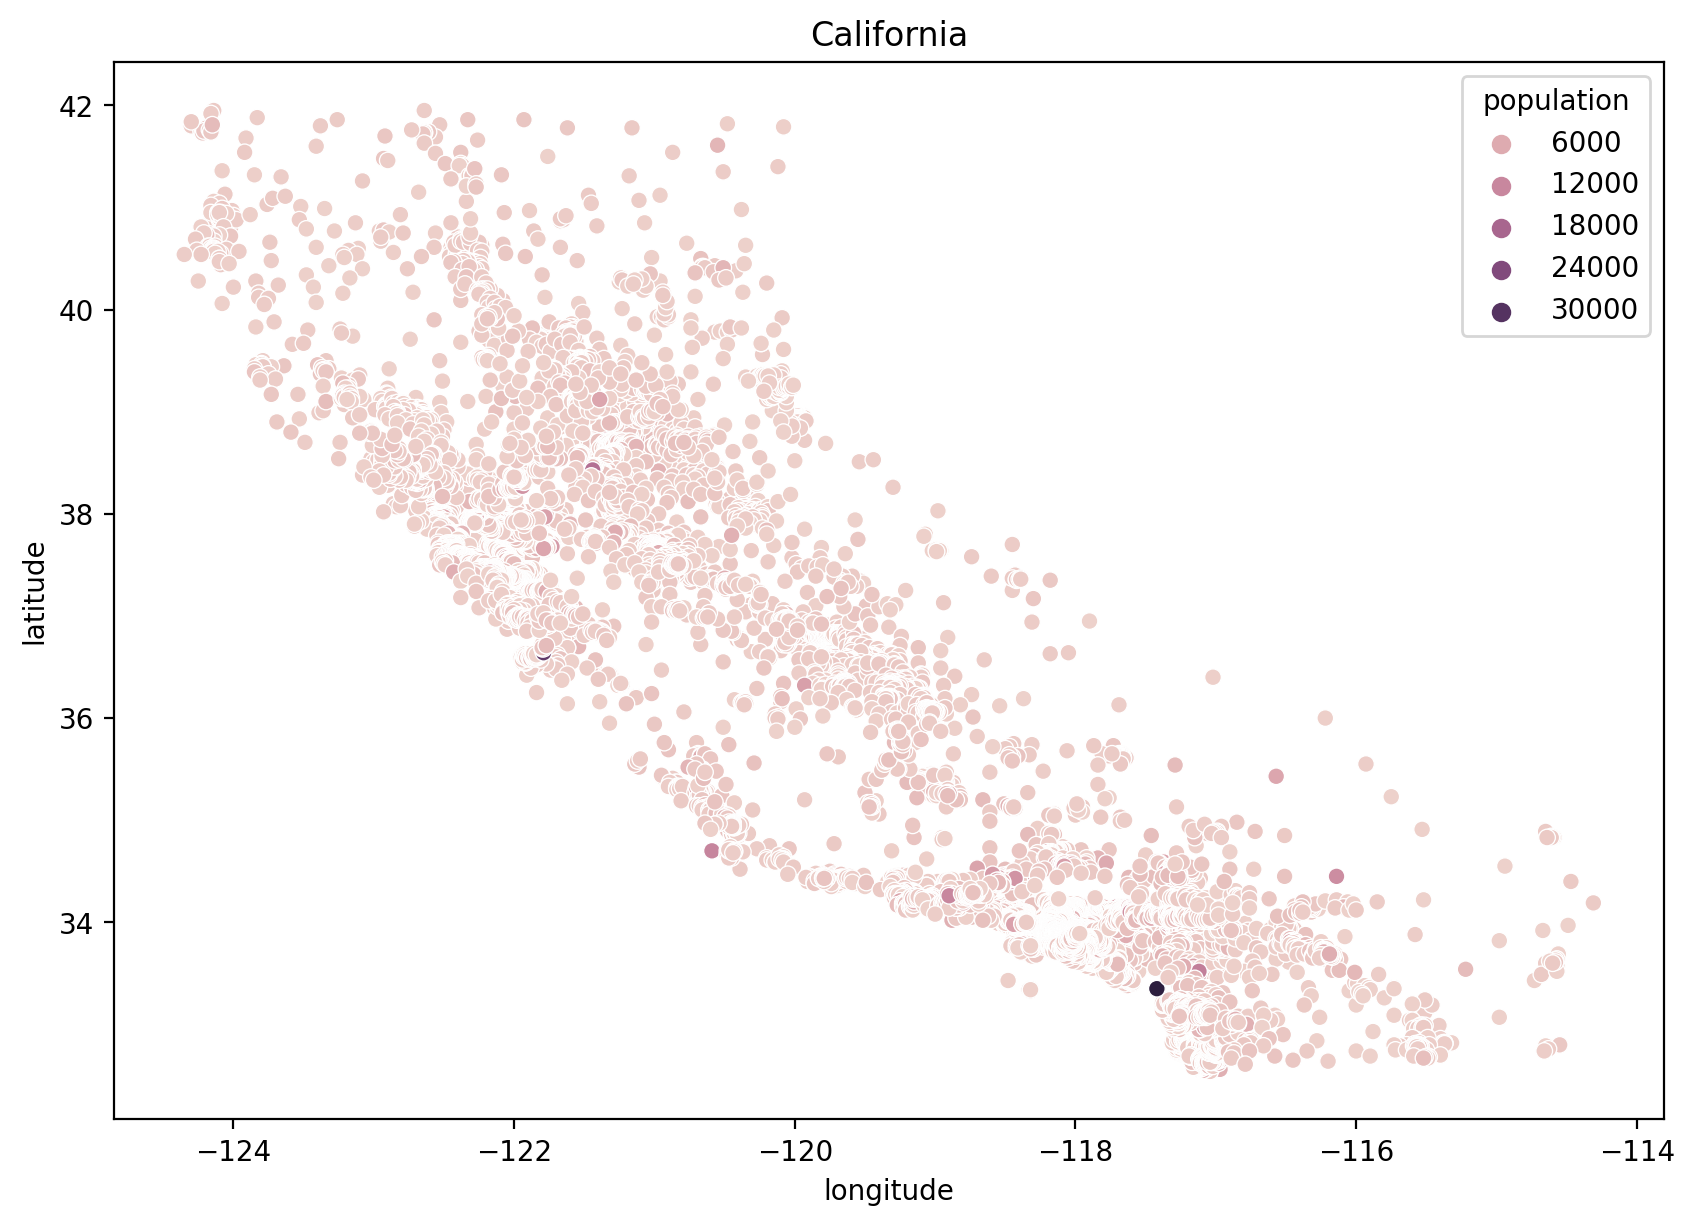

In [222]:
plt.figure(figsize=(10,7), dpi=200)
sns.scatterplot(data=df, x='longitude',y='latitude',hue='population' )
plt.title("California");

In [223]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


Text(0.5, 1.0, 'Pearson correlation coefficient')

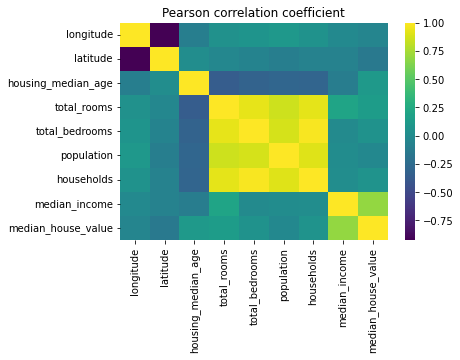

In [224]:
sns.heatmap(df.corr(), cmap='viridis')
plt.title('Pearson correlation coefficient')

In [225]:
median_house_value_corr = df.corr()['median_house_value']

In [226]:
median_house_value_corr

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [227]:
median_house_value_corr.sort_values()

latitude             -0.144160
longitude            -0.045967
population           -0.024650
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [228]:
median_house_value_corr = median_house_value_corr.sort_values()

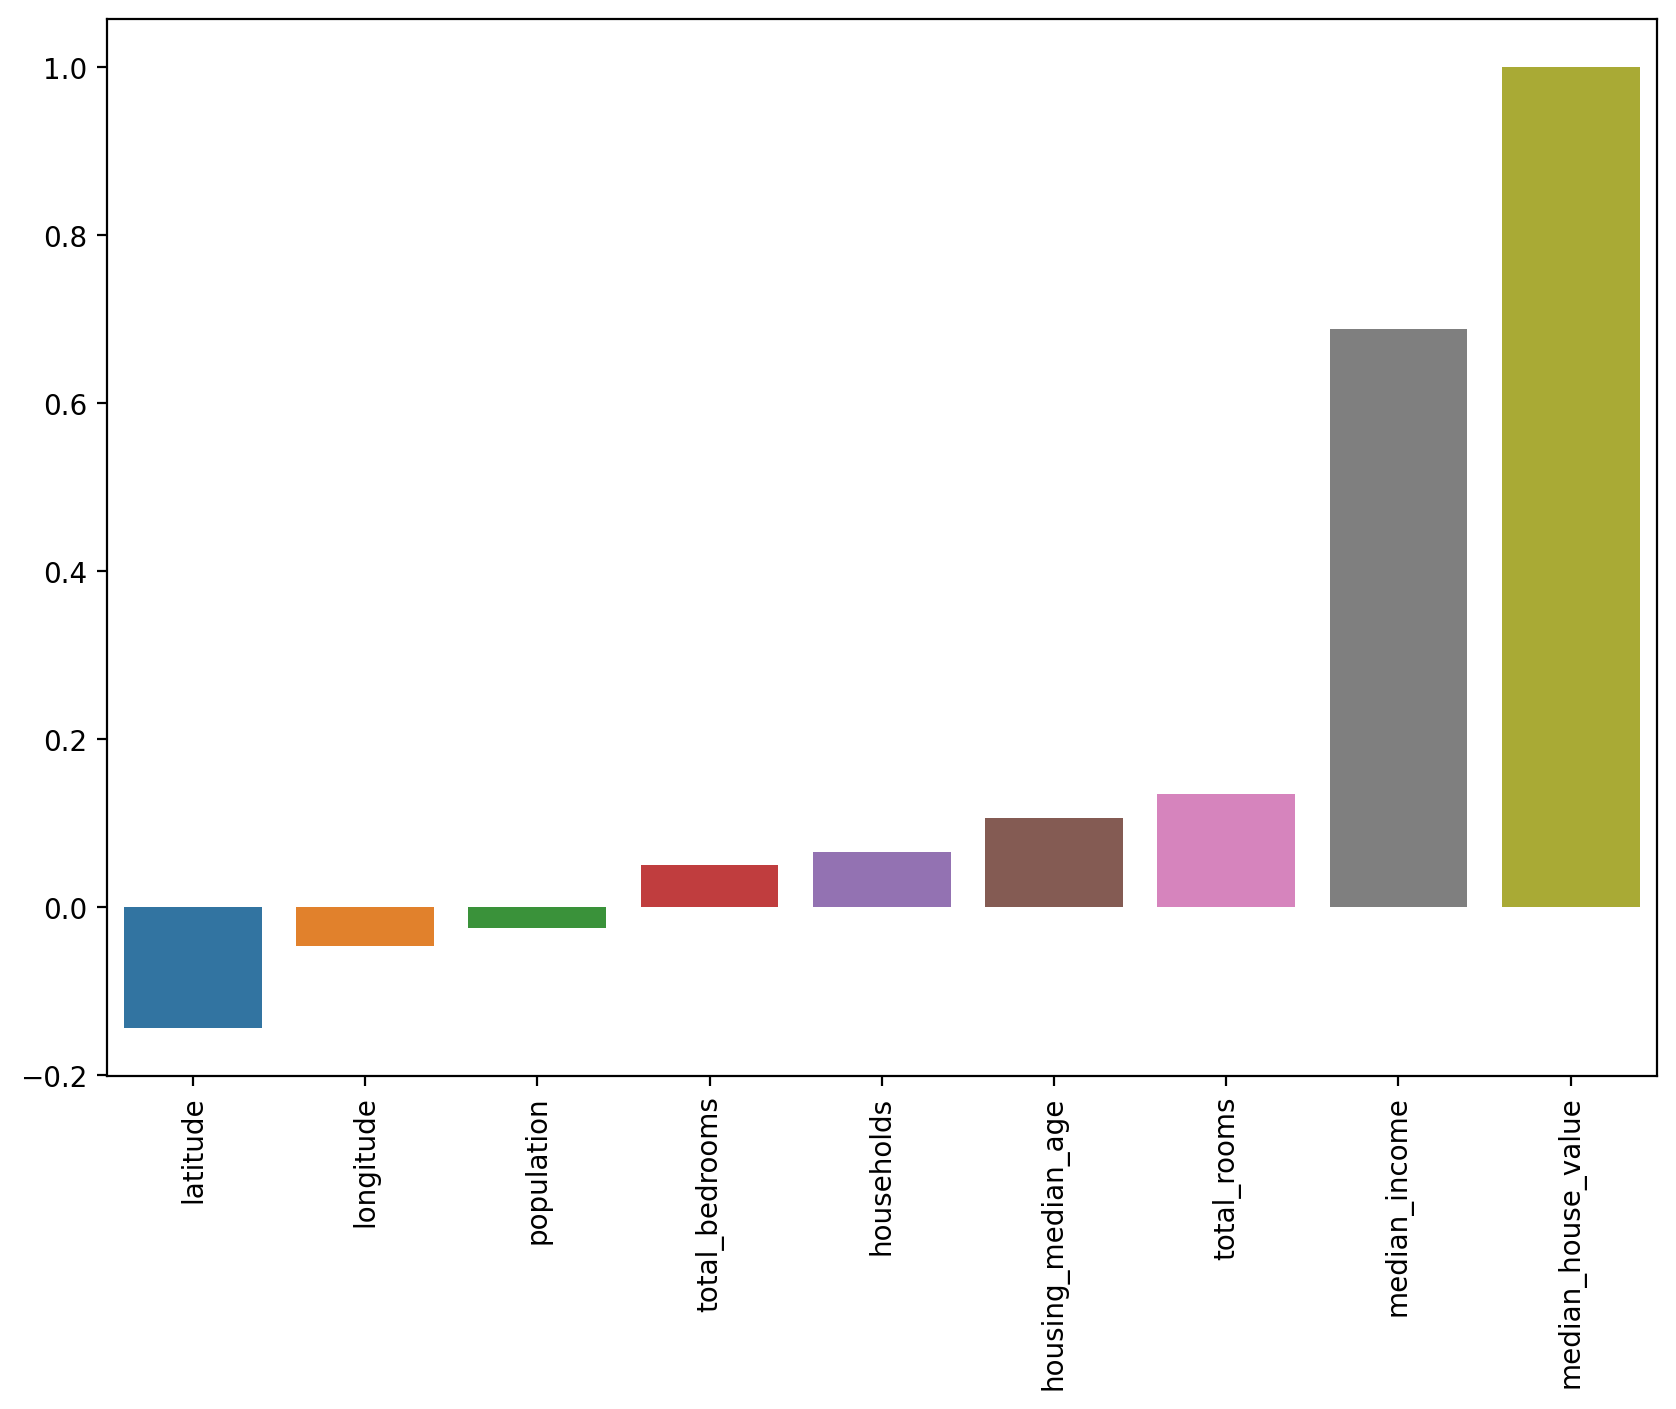

In [229]:
plt.figure(figsize=(10,7),dpi=200)
sns.barplot(x=median_house_value_corr.index, y=median_house_value_corr.values)
plt.xticks(rotation=90);

***Data preparation***

In [230]:
df_modified = pd.get_dummies(df)

In [231]:
df_modified

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [232]:
df_modified.isnull().sum()

longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                207
population                      0
households                      0
median_income                   0
median_house_value              0
ocean_proximity_<1H OCEAN       0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64

In [233]:
df_modified['total_bedrooms'].mean()

537.8705525375618

In [234]:
df_modified['total_bedrooms'] = df_modified['total_bedrooms'].fillna(df_modified['total_bedrooms'].mean())

In [235]:
X = df_modified.drop('median_house_value', axis=1)
y = df_modified['median_house_value']

In [236]:
from sklearn.model_selection import train_test_split

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [238]:
from sklearn.preprocessing import StandardScaler

In [239]:
scaler = StandardScaler()

In [240]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [241]:
from sklearn.linear_model import LinearRegression

In [242]:
lr_model = LinearRegression()

In [243]:
lr_model.fit(X_train_scaled,y_train)

LinearRegression()

In [244]:
y_pred = lr_model.predict(X_test_scaled)

In [245]:
lr_model.intercept_, lr_model.coef_

(207194.6106924438,
 array([-5.38297453e+04, -5.44182829e+04,  1.38903454e+04, -1.30940624e+04,
         4.30677536e+04, -4.34040223e+04,  1.83828290e+04,  7.51679442e+04,
         1.20569255e+15,  1.12856779e+15,  3.77596400e+13,  7.66024822e+14,
         8.06084805e+14]))

In [246]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [247]:
mae = mean_absolute_error(y_test,y_pred)

In [248]:
mae

50701.85847747063

In [249]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

In [250]:
rmse

70031.44747222018